# Data

In [1]:
import pandas as pd

# Chemin des données
data_path = './nba_logreg.csv'

# Dataframe
df = pd.read_csv(data_path)
df

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,Chris Smith,80,15.8,4.3,1.6,3.6,43.3,0.0,0.2,14.3,...,1.5,79.2,0.4,0.8,1.2,2.5,0.6,0.2,0.8,0.0
1336,Brent Price,68,12.6,3.9,1.5,4.1,35.8,0.1,0.7,16.7,...,1.0,79.4,0.4,1.1,1.5,2.3,0.8,0.0,1.3,1.0
1337,Marlon Maxey,43,12.1,5.4,2.2,3.9,55.0,0.0,0.0,0.0,...,1.6,64.3,1.5,2.3,3.8,0.3,0.3,0.4,0.9,0.0
1338,Litterial Green,52,12.0,4.5,1.7,3.8,43.9,0.0,0.2,10.0,...,1.8,62.5,0.2,0.4,0.7,2.2,0.4,0.1,0.8,1.0


# Data Pre-processing

## Valeurs nulles

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         1340 non-null   object 
 1   GP           1340 non-null   int64  
 2   MIN          1340 non-null   float64
 3   PTS          1340 non-null   float64
 4   FGM          1340 non-null   float64
 5   FGA          1340 non-null   float64
 6   FG%          1340 non-null   float64
 7   3P Made      1340 non-null   float64
 8   3PA          1340 non-null   float64
 9   3P%          1329 non-null   float64
 10  FTM          1340 non-null   float64
 11  FTA          1340 non-null   float64
 12  FT%          1340 non-null   float64
 13  OREB         1340 non-null   float64
 14  DREB         1340 non-null   float64
 15  REB          1340 non-null   float64
 16  AST          1340 non-null   float64
 17  STL          1340 non-null   float64
 18  BLK          1340 non-null   float64
 19  TOV   

La colonne 3P% comporte 11 valeurs nulles.

In [3]:
df[df.isna().any(axis=1)]

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
338,Ken Johnson,64,12.7,4.1,1.8,3.3,52.8,0.0,0.0,NaN,...,1.3,43.5,1.4,2.4,3.8,0.3,0.2,0.3,0.9,0.0
339,Ken Johnson,64,12.7,4.1,1.8,3.3,52.8,0.0,0.0,NaN,...,1.3,43.5,1.4,2.4,3.8,0.3,0.2,0.3,0.9,0.0
340,Pete Williams,53,10.8,2.8,1.3,2.1,60.4,0.0,0.0,NaN,...,0.8,42.5,0.9,1.9,2.8,0.3,0.4,0.4,0.4,0.0
358,Melvin Turpin,79,24.7,10.6,4.6,9.0,51.1,0.0,0.0,NaN,...,1.8,78.4,2.0,3.8,5.7,0.5,0.5,1.1,1.5,1.0
386,Jim Petersen,60,11.9,3.2,1.2,2.4,48.6,0.0,0.0,NaN,...,1.1,75.8,0.7,1.7,2.5,0.5,0.2,0.5,1.2,1.0
397,Tom Scheffler,39,6.9,1.3,0.5,1.3,41.2,0.0,0.0,NaN,...,0.5,50.0,0.5,1.5,1.9,0.3,0.2,0.3,0.4,0.0
507,Sam Williams,59,18.2,6.1,2.6,4.7,55.6,0.0,0.0,NaN,...,1.5,55.1,1.5,3.7,5.2,0.6,0.8,1.3,1.1,0.0
509,Kurt Nimphius,63,17.2,5.3,2.2,4.7,46.1,0.0,0.0,NaN,...,1.7,58.3,1.5,3.2,4.7,1.0,0.3,1.3,0.9,1.0
510,Pete Verhoeven,71,17.0,4.9,2.1,4.2,50.3,0.0,0.0,NaN,...,1.0,70.8,1.5,2.1,3.6,0.7,0.6,0.3,0.8,1.0
521,Jim Smith,72,11.9,2.9,1.2,2.3,50.9,0.0,0.0,NaN,...,1.2,45.9,1.0,1.5,2.5,0.6,0.3,0.7,0.7,0.0


Le feature 3P% étant probablement le ratio entre le nombre de paniers à 3 points tentés et le nombre de paniers à 3 points marqués, les valeurs nulles sont sûrement dues à l'absence de tentative de panier à 3 points. On remplace donc les valeurs nulles par 0

In [4]:
# On remplace tous les nan du dataframe par 0.0
df = df.fillna(0.0)

## Doublons

In [5]:
# Nombre de doublons dans les données
print("Nombre de doublons :", df.duplicated().sum())

duplicate_rows = [] # Liste des indexes des doublons
for i, _bool in df.duplicated().items():
    # Si la ligne est un doublon
    if _bool == True:
        duplicate_rows.append(i) # Ajout de l'indexe du doublon à la liste des doublons

# Doublons du dataframe 
df.iloc[duplicate_rows]

Nombre de doublons : 12


,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
163,Charles Smith,60,8.7,2.9,1.0,2.2,44.4,0.0,0.1,0.0,...,1.3,69.7,0.2,0.9,1.2,1.7,0.6,0.1,0.6,1.0
166,Charles Smith,71,30.4,16.3,6.1,12.4,49.5,0.0,0.0,0.0,...,5.5,72.5,2.4,4.1,6.5,1.5,1.0,1.3,2.1,1.0
169,Charles Smith,34,8.6,3.5,1.4,3.7,39.2,0.4,1.4,31.9,...,0.3,54.5,0.4,0.4,0.8,0.6,0.3,0.2,0.8,1.0
243,Reggie Williams,35,24.5,10.4,4.3,12.2,35.6,0.4,1.7,22.4,...,1.9,72.7,1.6,1.8,3.4,1.7,0.8,0.6,1.8,1.0
339,Ken Johnson,64,12.7,4.1,1.8,3.3,52.8,0.0,0.0,0.0,...,1.3,43.5,1.4,2.4,3.8,0.3,0.2,0.3,0.9,0.0
366,Charles Jones,78,20.1,8.4,3.0,5.8,52.0,0.0,0.1,0.0,...,3.6,64.8,1.8,3.3,5.1,1.6,0.6,0.8,1.8,0.0
369,Charles Jones,29,16.4,3.7,1.3,4.2,31.7,0.7,2.1,31.1,...,0.8,50.0,0.3,1.1,1.4,1.4,0.6,0.2,1.0,0.0
504,Eddie Johnson,74,20.5,9.3,4.0,8.7,45.9,0.0,0.1,9.1,...,2.0,66.4,1.7,2.6,4.4,1.5,0.7,0.2,1.3,1.0
733,Gerald Henderson,43,8.3,2.6,0.9,2.4,35.6,0.1,0.4,21.1,...,1.1,74.5,0.3,0.9,1.3,0.3,0.2,0.2,0.3,1.0
824,Marcus Williams,79,16.6,6.8,2.6,6.7,39.5,0.6,2.1,28.2,...,1.1,84.7,0.4,1.7,2.1,3.3,0.4,0.0,1.8,0.0


In [6]:
# Supprimer les doublons du dataframe
df = df.drop_duplicates(ignore_index=True)

# EDA

In [7]:
df['TARGET_5Yrs'].value_counts()

TARGET_5Yrs
1.0    824
0.0    504
Name: count, dtype: int64

Moyenne des différents features

In [8]:
df.drop(['Name', 'TARGET_5Yrs'], axis=1).mean()

GP         60.411145
MIN        17.634413
PTS         6.804217
FGM         2.630271
FGA         5.885542
FG%        44.184639
3P Made     0.247741
3PA         0.778690
3P%        19.177485
FTM         1.298117
FTA         1.822139
FT%        70.325226
OREB        1.009714
DREB        2.027636
REB         3.036446
AST         1.551205
STL         0.619051
BLK         0.368675
TOV         1.193599
dtype: float64

In [9]:
df.drop(['Name', 'TARGET_5Yrs'], axis=1).median()

GP         63.00
MIN        16.10
PTS         5.55
FGM         2.10
FGA         4.80
FG%        44.10
3P Made     0.10
3PA         0.30
3P%        22.20
FTM         1.00
FTA         1.50
FT%        71.25
OREB        0.80
DREB        1.70
REB         2.50
AST         1.10
STL         0.50
BLK         0.20
TOV         1.00
dtype: float64

Moyenne des différents features en fonction du label (TARGET_5Yrs)

In [10]:
df.groupby('TARGET_5Yrs')[df.columns.drop('Name')].mean()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
TARGET_5Yrs,,,,,,,,,,,,,,,,,,,,
0.0,51.434524,14.231746,5.038690,1.945040,4.540278,42.374206,0.229365,0.753175,19.193651,0.921825,1.318254,68.902381,0.716865,1.527976,2.242857,1.215079,0.498413,0.252976,0.939087,0.0
1.0,65.901699,19.715655,7.884102,3.049393,6.708374,45.291990,0.258981,0.794296,19.167597,1.528277,2.130340,71.195510,1.188835,2.333252,3.521845,1.756796,0.692840,0.439442,1.349272,1.0


Les features GP, MIN, PTS, FGM, FGA, FG% et FT% semblent avoir les plus grosses différences de moyennes.

## Distributions

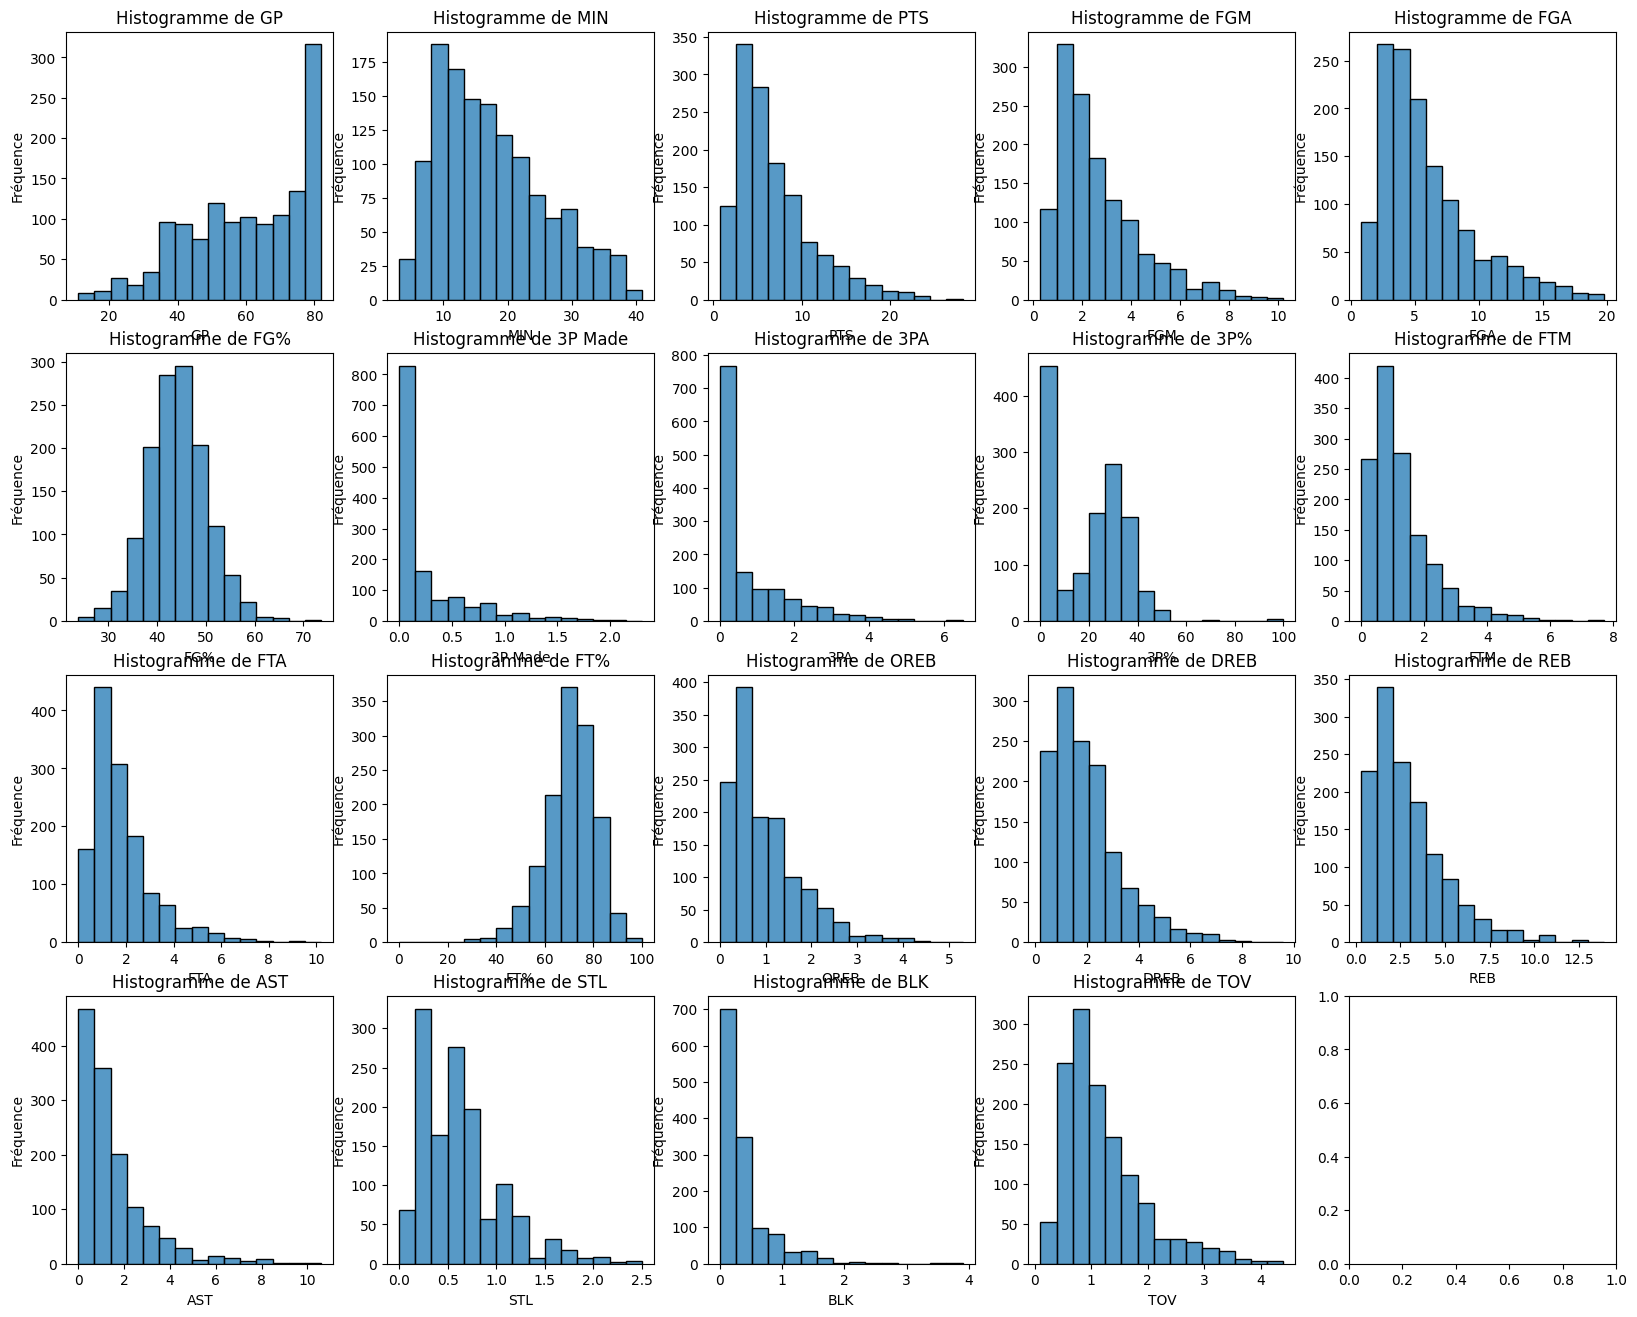

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# df_vals = df.drop(['TARGET_5Yrs','Name'],axis=1)

# Histogrammes de distributions
fig, axes = plt.subplots(4, 5, figsize=(5 * 4, 4 * 4))
axes = axes.flatten()

# Tracer chaque histogramme
for i, colonne in enumerate(df.drop(['TARGET_5Yrs','Name'],axis=1)):
    sns.histplot(df[colonne], bins=15, ax=axes[i])
    axes[i].set_title(f'Histogramme de {colonne}')
    axes[i].set_xlabel(colonne)
    axes[i].set_ylabel('Fréquence')

- La majorité des variables ont une distribution asymétrique positive, avec de nombreux joueurs ayant des performances faibles et un petit nombre ayant des performances élevées.
- Certaines variables, comme MIN, semblent être plus uniformément réparties, bien qu'elles montrent une concentration autour de 20 à 40 minutes pour la plupart des joueurs.
- FT% et FG% montrent une distribution relativement normale, reflétant probablement que la précision est souvent située autour d'une moyenne pour la plupart des joueurs.
- La distribution de variables comme PTS, REB et AST montrent des valeurs extrêmes, avec certains joueurs qui ont de très bonnes performances. Ces features pourraient jouer un rôle déterminant pour différencier les joueurs qui réussisent en NBA et ceux qui échouent.

Les statistiques comme PTS, FGM ou FTM indiquent la contribution offensive des joueurs, tandis que des données comme REB, STL, ou BLK montrent leur rôle défensif ou leur contribution à l'équipe. Une combinaison de ces features pourrait être un bon indicateur de la longétivité de la carrière.

## Matrice de corrélations

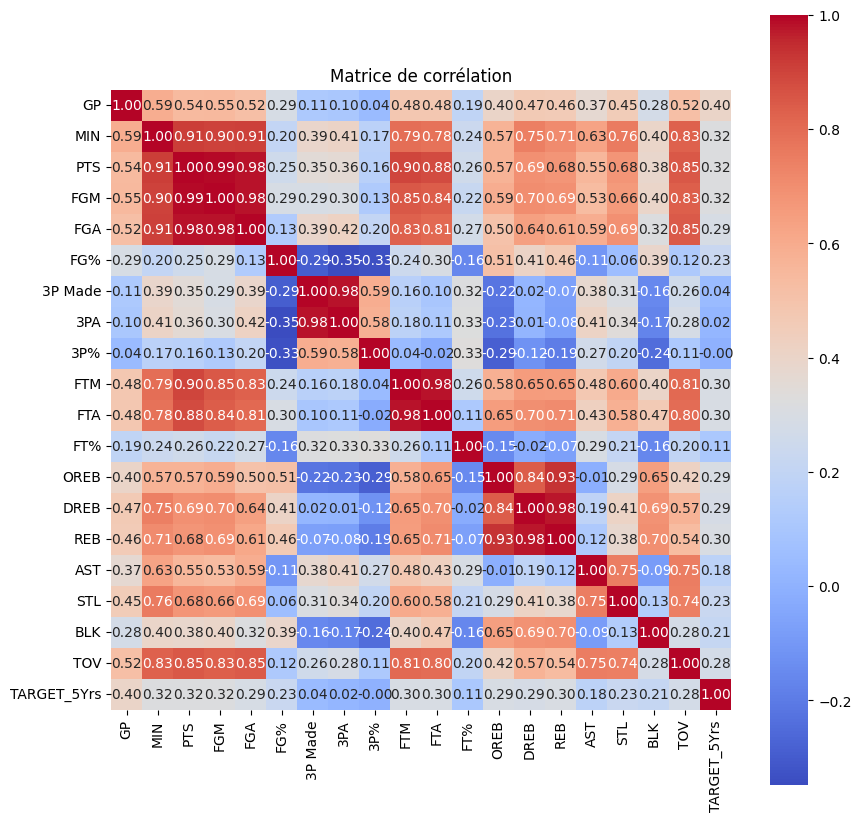

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Matrice de corrélation
correlation_matrix = df.drop(['Name'],axis=1).corr()

# Figure matrice de corrélation
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Matrice de corrélation")
plt.show()

Les corrélations les plus significatives avec TARGET_5Yrs sont :
- GP : Corrélation modérée (0.40).
- MIN, PTS, FGM,  : Corrélation modérée (0.32).
- REB, FTM, FTA : Corrélation faible à modérée (0.30).
- FGA, OREB, DREB, TOV : Corrélation faible (0.29 ; 0.28)

Ces corrélations suggèrent que les performances générales comme le nombre de matchs (GP), le temps de jeu (MIN), les actions offensives (PTS, FGA, FGM, FTM, FTA), la possession de la balle (REB, OREB, DREB) et les pertes de balles (TOV) influencent la probabilité de jouer plus de 5 ans en NBA.

Certaines features sont fortement corrélées entre elles :
- PTS est fortement corrélé avec FGM (0.99), FGA (0.98), GTM (0.90) et FTA (0.84). Les points marqués sont probablement liés aux tirs effectués et aux lancers francs tentés. Ainsi, il serait cohérent de ne conserver qu'une seule feature pour représenter la capacité offensive des joueurs.
- REB (rebonds) est logiquement corrélé avec OREB (0.93) et DREB (0.98). Ainsi, il serait cohérent de ne conserver qu'une seule feature pour représenter la contribution des joueurs à leur équipe.
- MIN (minutes jouées) est fortement corrélé avec plusieurs features comme PTS (0.91), FGM (0.90), et REB (0.69). Cela montre que les joueurs ayant plus de temps de jeu ont un impact global plus important. Cela pourrait entraîner de la redondance dans un modèle, il serait donc cohérent de combiner MIN avec PTS (PTS/MIN).
- TOV est corrélée avec les actions offensives (PTS, FGM, FGA, FTM, FTA). Les joueurs qui ont un rôle offensif important sont probablement plus enclins à perdre la balle. 

Certaines features ne sont que faiblement corrélée avec la target : Les pourcentages de réussite aux tirs (FG%, 3P%, FT%) montrent peu de corrélation avec la target.


Features selection : 
- Toutes les features
- GP, MIN, PTS (Les features ayant les corrélations avec la target les plus significatives)
- GP, PTS/MIN, REB, AST, STL, BLK (Les performances offensives, d'assistance et de défenses)


# Model

## Base model (SVC and random forest)

In [23]:
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, recall_score
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

def score_classifier(dataset,classifier,labels):

    """
    performs 3 random trainings/tests to build a confusion matrix and prints results with precision and recall scores
    :param dataset: the dataset to work on
    :param classifier: the classifier to use
    :param labels: the labels used for training and validation
    :return:
    """

    kf = KFold(n_splits=3,random_state=50,shuffle=True)
    confusion_mat = np.zeros((2,2))
    recall = 0
    for training_ids,test_ids in kf.split(dataset):
        training_set = dataset[training_ids]
        training_labels = labels[training_ids]
        test_set = dataset[test_ids]
        test_labels = labels[test_ids]
        classifier.fit(training_set,training_labels)
        predicted_labels = classifier.predict(test_set)
        confusion_mat+=confusion_matrix(test_labels,predicted_labels)
        recall += recall_score(test_labels, predicted_labels)
    recall/=3
    print(confusion_mat)
    print(recall)
    
# extract names, labels, features names and values
names = df['Name'].values.tolist() # players names
labels = df['TARGET_5Yrs'].values # labels
paramset = df.drop(['TARGET_5Yrs','Name'],axis=1).columns.values
df_vals = df.drop(['TARGET_5Yrs','Name'],axis=1)

# normalize dataset
X = MinMaxScaler().fit_transform(df_vals)

#example of scoring with support vector classifier
print("SVC")
score_classifier(X,SVC(),labels)

#example of scoring with random forest classifier
print("random forest")
score_classifier(X,RandomForestClassifier(),labels)

SVC
[[262. 242.]
 [138. 686.]]
0.8325233519478124
random forest
[[271. 233.]
 [170. 654.]]
0.7934597776324396


## Test models

Dans cette partie, essayons d'effectuer un premier test des performances de différents modèles sur les différentes combinaisons de features définies.

In [13]:
from sklearn.model_selection import cross_validate, KFold

# Fonction pour avoir des scores en fonction de différents modèles
def get_model_scores(X, y, metrics:list, k:int, models:dict):
    
    # Définition de la validation croisée k-fold
    kfold = KFold(n_splits=k, shuffle=True, random_state=42)
        
    # Dictionnaire des différents scores en fonction des modèles
    model_scores = {}

    # Pour chaque modèle :
    for model_name, model in models.items():
        
        # Utilisation de cross_val_score pour évaluer le modèle
        scores = cross_validate(model, X, y, cv=kfold, scoring=metrics)

        # Supprimer clés fit_time et score_time
        del scores['fit_time']
        del scores['score_time']

        # Moyenne des plis pour chaque métrique
        scores_mean = {}
        for metric, score in scores.items():
            scores_mean[metric] = score.mean()
        
        model_scores[model_name] = scores_mean

    return model_scores

In [14]:
# Fonction pour avoir les scores des modèles pour chaque combinaison de features
def get_model_scores_by_features(dataset, feature_combination:dict, y, metrics, k, models):
    
    model_scores_by_features = {} # Dictionnaire des scores des modèles par features sélectionnés
    
    # Pour chaque combinaison de features
    for combination, features in feature_combination.items(): 
        
        # Définition des données des features sélectionnés
        X = MinMaxScaler().fit_transform(dataset[features]) # Normalisation des données

        # Scores pour chaque modèle sur les données des features
        model_scores = get_model_scores(X, y, metrics, k, models)
        
        model_scores_by_features[combination] = model_scores # Ajout des scores dans le dictionnaire

    return model_scores_by_features

In [16]:
# Ajouter la colonne PTS/MIN dans le dataframe
df['PTS/MIN'] = df['PTS'] / df['MIN']
df.head()

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs,PTS/MIN
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0,0.270073
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0,0.267658
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0,0.339869
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0,0.491379
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0,0.391304


In [19]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Combinaison de features à tester
feature_combination = {
    'all' : list(df.drop(['Name', 'TARGET_5Yrs', 'PTS/MIN'], axis=1).columns),
    'gp_min_pts' : ['GP', 'MIN', 'PTS'],
    'new_features' : ['GP', 'PTS/MIN', 'REB', 'AST', 'STL', 'BLK']
}

# Dictionnaire de modèles
models = {
    'svc': SVC(), 
    'random_forest': RandomForestClassifier(), 
    'logistic_regression': LogisticRegression(), 
    'knn': KNeighborsClassifier(n_neighbors=3), 
    'xgboost': XGBClassifier(),
    'lda': LinearDiscriminantAnalysis()
}

# Définition des métriques
metrics = ['recall', 'precision', 'f1']

# Définition de la validation croisée k-fold
k = 3 # Nombre de folds 

# Définition de la target
y = df['TARGET_5Yrs']

# scores des différents modèles pour chaque combinaison de features
model_scores_by_features = get_model_scores_by_features(df, feature_combination, y, metrics, k, models)


In [22]:
# Transformation du dictionnaire des scores en dataframe pandas
rows = []
for feature_combination, model_scores in model_scores_by_features.items():
    for model, score in model_scores.items():
        row = {'feature_combination': feature_combination, 'model_scores': model, **score}
        rows.append(row)
df_score = pd.DataFrame(rows)

# Tri du dataframe par rapport au score
df_score.sort_values(by='test_f1', ascending=False)

,feature_combination,model_scores,test_recall,test_precision,test_f1
2,all,logistic_regression,0.832190,0.742051,0.784006
5,all,lda,0.828279,0.739539,0.781112
0,all,svc,0.813664,0.749272,0.778388
14,new_features,logistic_regression,0.819975,0.737434,0.776077
17,new_features,lda,0.804821,0.744838,0.773403
12,new_features,svc,0.801350,0.744392,0.771322
8,gp_min_pts,logistic_regression,0.813741,0.731597,0.770180
6,gp_min_pts,svc,0.806561,0.737664,0.769378
11,gp_min_pts,lda,0.805881,0.731623,0.766757
1,all,random_forest,0.790460,0.734365,0.760590


- La combinaison all (toutes les features) donne généralement de bonnes performances globales. En effet cette combinaison obtient les meilleurs f1-scores avec les modèles de régression logistiques, LDA et SVC. 
- La combinaison new_features (GP, PTS/MIN, REB, AST, STL, BLK) a des scores compétitifs avec la combinaison all, toujours avec les modèles de régression logistique, LDA et SVC. Cela montre que cette combinaison capture bien les signaux importants pour la classification.
- La combinaison gp_min_pts (GP, MIN, et PTS) a des performances légèrement inférieures, toujours avec les mêmes modèles de régression logistique, LDA, et SVC. Cela indique que ces trois variables seules ne suffisent pas à capturer toute la complexité des données.

Pour la suite, nous choisirons donc de tester les modèles Logistic Regression, LDA et SVC


### Choix de la métrique

Dans le contexte où l'objectif est de prédire si un joueur vaut le coup d'investir pour des investisseurs cherchant à capitaliser sur de futurs talents, la métrique à privilégier dépend du type de risque que les investisseurs sont prêts à prendre.

De mon point de vue, je pense que l'investissement dans un joueur qui échoue (faux positif) est plus couteux que de passer à côté de joueur qui réussissent (faux négatifs) En effet, les ressources d'investissement sont limitées, et chaque erreur coûte potentiellement cher. Vous voulez que chaque joueur recommandé ait une forte probabilité de réussite. Ainsi, nous utiliserons la métrique de la précision afin de garantir que les joueurs identifiés comme prometteurs le soient réellement.

### Définition des features et des hyperparamètres optimaux

In [24]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import precision_score
from tqdm import tqdm

# Combinaison de features à tester
feature_combination = {
    'all' : list(df.drop(['Name', 'TARGET_5Yrs', 'PTS/MIN'], axis=1).columns), # Tous les features
    'gp_min_pts' : ['GP', 'MIN', 'PTS'], # Uniquement les features qui ont des corrélations les plus fortes avec la target
    'new_features' : ['GP', 'PTS/MIN', 'REB', 'AST', 'STL', 'BLK'] # Features des performances offensives, d'assistance, et défensives
}

# Dictionnaire de modèles à tester
models = {
    'svc': SVC(), 
    'logistic_regression': LogisticRegression(), 
    'lda': LinearDiscriminantAnalysis(),
}

# Définir la grille d'hyperparamètres
model_param_grid = {
    "svc": {
        "C": [0.1, 1, 10, 100],
        "kernel": ["linear", "rbf", "poly"],
        "gamma": ["scale", "auto"],
        "degree": [2, 3, 4]
    },
    "logistic_regression": {
        "penalty": ["l1", "l2", "elasticnet", "none"],
        "C": [0.1, 1, 10, 100],
        "solver": ["liblinear", "saga"]
    },
    "lda": {
        "solver": ["svd", "lsqr", "eigen"],
        "shrinkage": [None, "auto", 0.1, 0.5, 0.9]
    }
}

model_precision_by_features = {}
best_params_by_features = {}
for combination, features in tqdm(feature_combination.items(), desc='features combination'):
    
    print("Combination:", combination)
    
    # Définition des données
    X = MinMaxScaler().fit_transform(df[features]) # Normalisation des données
    y = df['TARGET_5Yrs']

    # Séparation des données
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


    model_precision_score = {}
    best_params = {}
    
    # Pour chaque combinaisons d'hyperparamètres de modèles à tester
    for model_name, param_grid in model_param_grid.items():

        # Définition du modèle
        model = models[model_name]
        
        # Grid Search avec validation croisée
        grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='precision', n_jobs=-1)
        grid_search.fit(X_train, y_train)
        
        # Meilleurs hyperparamètres
        best_params[model_name] = grid_search.best_params_
        
        # Évaluation finale sur le test set
        best_model = grid_search.best_estimator_
        y_pred = best_model.predict(X_test)
        model_precision_score[model_name] = precision_score(y_test, y_pred)
    
    # Précision des modèles en fonction des features sélectionnés
    model_precision_by_features[combination] = model_precision_score
    
    # Hyperparamètres optimaux des différents modèles en fonction des features sélectionnés
    best_params_by_features[combination] = best_params
    

features combination:   0%|          | 0/3 [00:00<?, ?it/s]

Combination: all


c:\Users\hugol\anaconda3\envs\test\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
48 fits failed out of a total of 96.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\hugol\anaconda3\envs\test\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\hugol\anaconda3\envs\test\lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\hugol\anaconda3\envs\test\lib\site-packages\sklearn\linear_model\_logistic.py", line 1194, in fit
    solver = _check_solv

Combination: gp_min_pts


c:\Users\hugol\anaconda3\envs\test\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
48 fits failed out of a total of 96.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\hugol\anaconda3\envs\test\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\hugol\anaconda3\envs\test\lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\hugol\anaconda3\envs\test\lib\site-packages\sklearn\linear_model\_logistic.py", line 1194, in fit
    solver = _check_solv

Combination: new_features


c:\Users\hugol\anaconda3\envs\test\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
48 fits failed out of a total of 96.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\hugol\anaconda3\envs\test\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\hugol\anaconda3\envs\test\lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\hugol\anaconda3\envs\test\lib\site-packages\sklearn\linear_model\_logistic.py", line 1194, in fit
    solver = _check_solv

In [ ]:
# Sauvegarder les dictionnaires model_precision_by_features et best_params_by_features pour garder une trace des modèles ayant les meilleurs scores et leurs hyperparamètres optimaux

# import json

# # Sauvegarder le dictionnaire best_params_by_features dans un fichier JSON
# with open('best_params_by_features.json', 'w', encoding='utf-8') as fichier:
#     json.dump(best_params_by_features, fichier, ensure_ascii=False, indent=4)
    
# # Sauvegarder le dictionnaire model_precision_by_features dans un fichier JSON
# with open('model_precision_by_features.json', 'w', encoding='utf-8') as fichier:
#     json.dump(model_precision_by_features, fichier, ensure_ascii=False, indent=4)


In [26]:
import json

# Charger best_params_by_features
with open('best_params_by_features.json', 'r', encoding='utf-8') as fichier:
    best_params_by_features = json.load(fichier)

# Charger model_precision_by_features
with open('model_precision_by_features.json', 'r', encoding='utf-8') as fichier:
    model_precision_by_features = json.load(fichier)

In [30]:
# Dataframe des scores de précision par features
df_precision_by_features = pd.DataFrame(model_precision_by_features)
df_precision_by_features

,all,gp_min_pts,new_features
svc,0.837662,0.856000,0.864662
logistic_regression,0.803191,0.806630,0.806818
lda,0.875912,0.822785,0.834395


- La combinaison all donne la meilleure précision pour LDA (87.6%). 
- La combinaison new_features est aussi particulièrement performante avec le modèle SVC (86.4%). Les features sélectionnées dans cette combinaison permettent de simplifier le modèle (moins de features) tout en conservant une forte capacité prédictive. Cette combinaison est un donc un bon compromis entre complexité et performance.
- La Combinaison gp_min_pts a aussi une bonne précision avec le modèle SVC (85.6%), mais reste légèrement moins performante pour les autres modèles. Les features de cette combinaison ne capturent pas suffisamment d’informations.

Le modèle LDA sur toutes les features semble donc être le meilleur modèle dans le cas où on veut privilégier la précision au recall.

Cependant, utiliser la combinaison de features new_features semble est être un bon compromis, car elle offre une bonne précision (avec le modèle SCV) tout en utilisant moins de features, ce qui simplifie le modèle ainsi que le travail de l'investisseur.

### Entraîner et tester les modèles avec leurs hyperparamètres optimaux sur plusieurs métriques

Dans cette partie, nous allons tester les modèles avec leurs hyperparamètres optimaux (définis dans la partie précédente) sur plusieurs métriques (précision, recall, f1-score). Bien que l'on veuille avoir une bonne précision, un équilibre entre précision et rappel peut être intéressant pour que le modèle ne passe pas à côté de joueurs prometteurs.

In [31]:
from sklearn.metrics import f1_score, precision_score, recall_score

In [33]:
# Dictionnaire des hyperparamètres optimaux sur les différentes combinaisons des features
best_params_by_features

{'all': {'svc': {'C': 100, 'degree': 3, 'gamma': 'auto', 'kernel': 'poly'},
  'logistic_regression': {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'},
  'lda': {'shrinkage': 0.9, 'solver': 'lsqr'}},
 'gp_min_pts': {'svc': {'C': 10,
   'degree': 4,
   'gamma': 'auto',
   'kernel': 'poly'},
  'logistic_regression': {'C': 10, 'penalty': 'l2', 'solver': 'saga'},
  'lda': {'shrinkage': 0.9, 'solver': 'lsqr'}},
 'new_features': {'svc': {'C': 100,
   'degree': 4,
   'gamma': 'auto',
   'kernel': 'poly'},
  'logistic_regression': {'C': 10, 'penalty': 'l2', 'solver': 'saga'},
  'lda': {'shrinkage': 0.9, 'solver': 'lsqr'}}}

In [52]:
# Combinaison de features à tester
feature_combination = {
    # 'all' : list(df.drop(['Name', 'TARGET_5Yrs', 'PTS/MIN'], axis=1).columns), # Tous les features
    # 'gp_min_pts' : ['GP', 'MIN', 'PTS'], # Uniquement les features qui ont des corrélations les plus fortes avec la target
    'new_features' : ['GP', 'PTS/MIN', 'REB', 'AST', 'STL', 'BLK'] # Features des performances offensives, d'assistance, et défensives
}

# Modèles à tester
models = {
    'svc': SVC, 
    'logistic_regression': LogisticRegression, 
    'lda': LinearDiscriminantAnalysis
}

# Scores de prédictions par combinaison de features
prediction_scores_by_features = {}

# modèles entraînés pour chaque combinaison de features
trained_models_by_features = {}

# Pour chaque combinaison de features
for combination, features in feature_combination.items():
    
    # Définition des données (toutes les features)
    X = MinMaxScaler().fit_transform(df[features]) # Normalisation des données
    y = df['TARGET_5Yrs']

    # Séparation des données
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Scores de prédictions par modèles
    prediction_scores_by_models = {}
    
    # Modèles entraînés
    trained_models = {}
    
    # Pour chaque modèle à tester
    for model_name, model in models.items():
        
        # Définir les hyperparamètres optimaux en fonction du modèle et des features utilisés
        best_params = best_params_by_features[combination][model_name]
        
        # Initialisation du modèle avec les hyperparamètres optimaux
        model = model(**best_params)
        
        # Entraînement du modèle
        model.fit(X_train, y_train)

        # Prédictions
        y_pred = model.predict(X_test)

        # Scores
        precision = precision_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        
        prediction_scores_by_models[model_name] = {
            'precision': precision,
            'f1_score': f1,
            'recall': recall
        }
        
        trained_models[model_name] = model
        
    prediction_scores_by_features[combination] = prediction_scores_by_models
    trained_models_by_features[combination] = trained_models

    

In [44]:
# Dictionnaire des métriques 
prediction_scores_by_features

{'new_features': {'svc': {'precision': 0.8382352941176471,
   'f1_score': 0.7434782608695653,
   'recall': 0.66796875},
  'logistic_regression': {'precision': 0.7814814814814814,
   'f1_score': 0.8022813688212928,
   'recall': 0.82421875},
  'lda': {'precision': 0.8166666666666667,
   'f1_score': 0.7903225806451613,
   'recall': 0.765625}}}

In [45]:
pd.DataFrame(prediction_scores_by_features['new_features']).transpose()

,precision,f1_score,recall
svc,0.838235,0.743478,0.667969
logistic_regression,0.781481,0.802281,0.824219
lda,0.816667,0.790323,0.765625


- SVC : Sa précision élevée (83.82%) est un point fort, ce qui peut être utile dans des contextes où il est crucial de minimiser les faux positifs (par exemple, éviter d'investir beaucoup de ressources dans des joueurs qui ne resteront pas plus de 5 ans en NBA). Cependant, son rappel est faible (66.80%), le modèle passera à côté de beaucoup de joueurs vrais positifs, ce qui pourrait être problématique si l'objectif est de détecter autant de joueurs prometteurs que possible.
- Logistic Regression : Son F1-score le plus élevé (80.23%) montre qu'il parvient à équilibrer précision et rappel. Si sa précision est légèrement inférieure à SVC et LDA, son rappel est élevé (82.42%) et en fait le meilleur choix si l'objectif est de maximiser la détection des vrais positifs tout en conservant une bonne précision.
- LDA : Ce modèle se situe entre les deux autres en termes de performance globale. Il offre un bon compromis entre précision et rappel, avec tout de même une précision légèrement plus élevée.

L'objectif principal étant d'avoir une précision élevée, le modèle SVC apparaît comme être le meilleur de par son score de précision. Cependant, le modèle LDA est légèrement moins performant en terme de précision (-2%) pour un recall bien plus performant (+10%). 

Pour la suite, nous choisirons donc le modèle LDA.

### Entraîner et tester le modèle choisi

In [47]:
trained_models_by_features['new_features']['lda']

LinearDiscriminantAnalysis(shrinkage=0.9, solver='lsqr')

In [48]:
import joblib

In [63]:
# Définir un scaler
scaler = MinMaxScaler()

# Définition des données ('GP', 'MIN', 'PTS')
X = scaler.fit_transform(df[['GP', 'PTS/MIN', 'REB', 'AST', 'STL', 'BLK']]) # Normalisation des données
y = df['TARGET_5Yrs']

# Sauvegarder le scaler
joblib.dump(scaler, 'scaler.pkl')

# Séparation des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Définition des hyperparamètres optimaux
lda_params = best_params_by_features['new_features']['lda']

# Initialisation du modèle
lda_model = LinearDiscriminantAnalysis(**lda_params)

# Entraînement du modèle
lda_model.fit(X_train, y_train)

# Prédictions
y_pred = lda_model.predict(X_test)

# Métriques
precision = precision_score(y_test, y_pred)
f1_ = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("precision :", precision)
print("f1-score :", f1)
print("recall :", recall)

precision : 0.8166666666666667
f1-score : 0.7903225806451613
recall : 0.765625


In [65]:
# Sauvegarder le modèle dans un fichier
joblib.dump(lda_model, 'lda_model.pkl')

['lda_model.pkl']

In [66]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 99  44]
 [ 60 196]]


- TP : 196 joueurs ont été prédits comme "réussite" et réussissent réellement a réster plus de 5 ans en NBA
- TN : 99 joueurs ont été prédits comme "échec" et échouent réellement à réster plus de 5 ans en NBA.
- FP : 44 joueurs ont été prédits comme "réussite" mais échouent à réster plus de 5 ans en NBA.
- FN : 60 joueurs ont été prédits comme "échec" mais réussissent à réster plus de 5 ans en NBA.

Le modèle est performant, avec un bon compromis entre faux positifs et et faux négatifs.  Cela montre que le modèle est fiable pour identifier les joueurs ayant une longue carrière tout en minimisant les erreurs.

In [67]:
from sklearn.metrics import roc_curve, roc_auc_score, RocCurveDisplay

y_scores = lda_model.decision_function(X_test)

# Calculer AUC et tracer
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
auc_score = roc_auc_score(y_test, y_scores)

AUC-ROC: 0.792


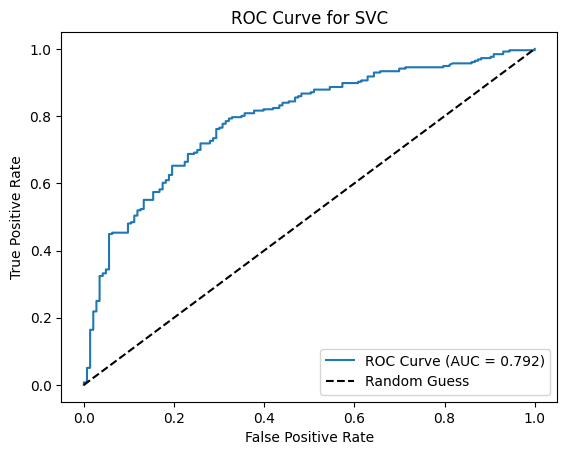

In [68]:
# Afficher le résultat
print(f"AUC-ROC: {auc_score:.3f}")

# Tracer la courbe ROC
plt.figure()
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.3f})")
plt.plot([0, 1], [0, 1], "k--", label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for SVC")
plt.legend(loc="lower right")
plt.show()

- L’aire sous la courbe ROC est de 0.792. Cela signifie que le modèle a environ 79.2% de chances de distinguer correctement entre un joueur ayant une longue carrière et un joueur qui n’en a pas.
- Au début la courbe s’éloigne bien de la ligne aléatoire (pointillés), en particulier au début, ce qui montre que le modèle détecte efficacement les vrais positifs tout en maintenant un faible taux de faux positifs. La courbe commence ensuite à se rapprocher de la ligne pointillée pour des taux de faux positifs plus élevés.